In [34]:
import sys
import gym
import numpy as np
from collections import defaultdict, deque
import matplotlib.pyplot as plt

import random
from IPython.display import clear_output

import warnings
warnings.simplefilter('ignore')
from time import sleep
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
env = gym.make('Taxi-v3')

In [3]:
env.reset()

341

In [4]:
print(env.action_space)
print(env.observation_space)

Discrete(6)
Discrete(500)


In [5]:
env.step(1)

(241, -1, False, {'prob': 1.0})

In [6]:
env.reset()

191

In [7]:
env.step(3)

(171, -1, False, {'prob': 1.0})

In [8]:
#STEP 1 - Initializing the Q-table

Q = np.zeros((env.observation_space.n, env.action_space.n))

In [24]:

#Setting the hyperparameters
              
alpha = 0.1 #learning rate                 
discount_factor = 0.618               
epsilon = 1                  
max_epsilon = 1
min_epsilon = 0.01         
decay = 0.01         

train_episodes = 20000    
test_episodes = 100          
max_steps = 100

In [25]:
#Training the agent

#Creating lists to keep track of reward and epsilon values
training_rewards = []  
epsilons = []

for episode in range(train_episodes):
    #Reseting the environment each time as per requirement
    state = env.reset()    
    #Starting the tracker for the rewards
    total_training_rewards = 0
    
    for step in range(100):
        #Choosing an action given the states based on a random number
        exp_exp_tradeoff = random.uniform(0, 1) 
        
        
        ### STEP 2: SECOND option for choosing the initial action - exploit     
        #If the random number is larger than epsilon: employing exploitation 
        #and selecting best action 
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(Q[state,:])      
            
        ### STEP 2: FIRST option for choosing the initial action - explore       
        #Otherwise, employing exploration: choosing a random action 
        else:
            action = env.action_space.sample()
            
            
        ### STEPs 3 & 4: performing the action and getting the reward     
        #Taking the action and getting the reward and outcome state
        new_state, reward, done, info = env.step(action)
        

        ### STEP 5: update the Q-table
        #Updating the Q-table using the Bellman equation
        Q[state, action] = Q[state, action] + alpha * (reward + discount_factor * np.max(Q[new_state, :]) - Q[state, action]) 
        #Increasing our total reward and updating the state
        total_training_rewards += reward      
        state = new_state         
        
        #Ending the episode
        if done == True:
            #print ("Total reward for episode {}: {}".format(episode, total_training_rewards))
            break
    
    #Cutting down on exploration by reducing the epsilon 
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay*episode)
    
    #Adding the total reward and reduced epsilon values
    training_rewards.append(total_training_rewards)
    epsilons.append(epsilon)
    
    

print ("Training score over time: " + str(sum(training_rewards)/train_episodes))

Training score over time: 6.57675


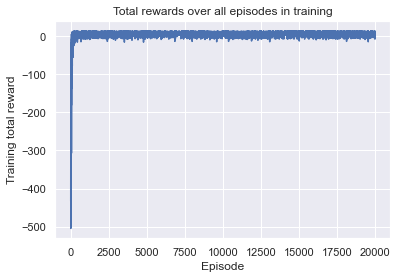

In [26]:

#Visualizing results and total reward over all episodes
x = range(train_episodes)
plt.plot(x, training_rewards)
plt.xlabel('Episode')
plt.ylabel('Training total reward')
plt.title('Total rewards over all episodes in training') 
plt.show()

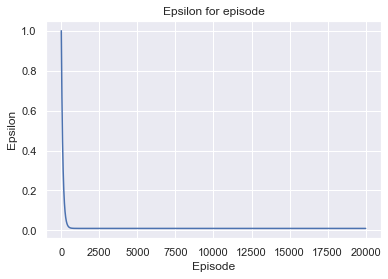

In [27]:
#Visualizing the epsilons over all episodes
plt.plot(epsilons)
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title("Epsilon for episode")
plt.show()

In [28]:
Q.shape

(500, 6)

In [29]:
np.argmax(Q[1])

4

In [31]:
# print the estimated optimal policy
policy_mc = np.array([np.argmax(Q[key])  for key in np.arange(500)])
policy_mc

array([0, 4, 4, 4, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 2, 0, 3,
       3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 3, 0, 3, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 4, 0, 4, 4,
       0, 3, 0, 3, 0, 3, 0, 0, 0, 5, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 2, 0, 2, 0, 3, 0, 3, 1, 0, 2, 2, 0, 0, 0, 3, 0, 0, 0, 0,
       3, 1, 3, 0, 0, 3, 3, 0, 1, 0, 1, 1, 3, 0, 0, 3, 0, 0, 0, 0, 3, 1,
       0, 0, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 1, 3, 2, 0, 2, 2, 3, 3, 0, 3, 2, 2, 2, 0, 1, 2, 3, 2, 0, 3,
       3, 3, 2, 0, 2, 1, 3, 3, 0, 3, 2, 2, 2, 0, 3, 2, 3, 2, 0, 3, 3, 3,
       1, 0, 1, 1, 3, 3, 0, 3, 0, 0, 0, 0, 3, 2, 3, 0, 0, 3, 3, 3, 1, 0,
       1, 1, 3, 3, 0, 3, 3, 0, 3, 0, 3, 1, 3, 3, 0,

In [32]:
policy_mc[267]

1

In [36]:
#
action = env.reset()
done = False
final_reward=0
while done==False:
    action=policy_mc[action]
    action, reward, done, _ = env.step(action)
    final_reward = final_reward + reward
    env.render()
    sleep(1)
print(final_reward)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y|